<a href="https://colab.research.google.com/github/student112-dev/MHA-2709-VINAY-LINGA/blob/main/NEPTUNE_Loans_Data_analysis_MHA_2709.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# STEP 1: Import Required Libraries

***For basic Data Handlings***

In [1]:
import pandas as pd
import numpy as np

***For PDF data extraction***

In [3]:
!pip install tabula-py
import tabula

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 92.9 MB/s eta 0:00:00


***Visualization***

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

***Settings***

In [5]:
import warnings
warnings.filterwarnings('ignore')

# STEP 2: Load and Combine Both Datasets

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


***2.1 Load Excel file: NEPTUNE Loan Data.xlsx***

In [8]:
excel_path = '/content/drive/MyDrive/NEPTUNE Loan Data (1).xlsx'
excel_df = pd.read_excel(excel_path)
excel_df.head()

,Loan_ID,Gender,Married,Dependents,Graduate,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,2284,1,0,0,0,0,3902,1666.0,109,333,1,3,Y
1,2287,2,0,0,1,0,1500,1800.0,103,333,0,2,N
2,2288,1,1,2,0,0,2889,0.0,45,180,0,1,N
3,2296,1,0,0,0,0,2755,0.0,65,300,1,3,N
4,2297,1,0,0,1,0,2500,20000.0,103,333,1,2,Y


***2.2 Load PDF file: NEPTUNE_Loans_Database_Table.pdf***

In [11]:
pdf_path = "/content/drive/MyDrive/NEPTUNE_Loans_Database_Table (1).pdf"
pdf_tables = tabula.read_pdf(pdf_path, pages='all', multiple_tables=True)
pdf_df = pd.concat(pdf_tables, ignore_index=True)
pdf_df.head()

,Loan_ID,Gender,Married,Dependents,Graduate,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,...,112,2131,3083,2168,126,2219,8750,4996,130,3.1
0,1002.0,1.0,0.0,0.0,1.0,0.0,5849.0,0.0,128.0,360.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1003.0,1.0,1.0,1.0,1.0,0.0,4583.0,1508.0,128.0,360.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1005.0,1.0,1.0,0.0,1.0,1.0,3000.0,0.0,66.0,360.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1006.0,1.0,1.0,0.0,0.0,0.0,2583.0,2358.0,120.0,360.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1008.0,1.0,0.0,0.0,1.0,0.0,6000.0,0.0,141.0,360.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# STEP 3: Data Preprocessing and Merging

In [13]:
pdf_df.columns = pdf_df.columns.str.strip().str.replace(" ", "_")
common_cols = ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Graduate', 'Self_Employed',
               'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term',
               'Credit_History', 'Property_Area', 'Loan_Status']
pdf_df = pdf_df[common_cols]
pdf_df['Loan_ID'] = pdf_df['Loan_ID'].astype(str)
excel_df['Loan_ID'] = excel_df['Loan_ID'].astype(str)
merged_df = pd.merge(pdf_df, excel_df, on='Loan_ID', how='outer')  # Combine unique records
merged_df.head()

,Loan_ID,Gender_x,Married_x,Dependents_x,Graduate_x,Self_Employed_x,ApplicantIncome_x,CoapplicantIncome_x,LoanAmount_x,Loan_Amount_Term_x,...,Dependents_y,Graduate_y,Self_Employed_y,ApplicantIncome_y,CoapplicantIncome_y,LoanAmount_y,Loan_Amount_Term_y,Credit_History_y,Property_Area_y,Loan_Status_y
0,1002.0,1.0,0.0,0.0,1.0,0.0,5849.0,0.0,128.0,360.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1003.0,1.0,1.0,1.0,1.0,0.0,4583.0,1508.0,128.0,360.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1005.0,1.0,1.0,0.0,1.0,1.0,3000.0,0.0,66.0,360.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1006.0,1.0,1.0,0.0,0.0,0.0,2583.0,2358.0,120.0,360.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1008.0,1.0,0.0,0.0,1.0,0.0,6000.0,0.0,141.0,360.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# STEP 4: Data Cleaning (Missing, Duplicates, Data Types)

In [20]:
# Drop duplicates
merged_df.drop_duplicates(inplace=True)

# Fill missing values for chosen columns (use '_x' versions)
merged_df['LoanAmount_x'].fillna(merged_df['LoanAmount_x'].median(), inplace=True)
merged_df['Loan_Amount_Term_x'].fillna(merged_df['Loan_Amount_Term_x'].median(), inplace=True)
merged_df['Credit_History_x'].fillna(1, inplace=True)  # assume positive if unknown

# Replace coded values in '_x' columns
replacements = {
    'Gender_x': {1: 'Male', 2: 'Female'},
    'Married_x': {0: 'Single', 1: 'Married'},
    'Graduate_x': {0: 'No', 1: 'Yes'},
    'Self_Employed_x': {0: 'No', 1: 'Yes'},
    'Property_Area_x': {1: 'Urban', 2: 'Semiurban', 3: 'Rural'},
    'Loan_Status_x': {'Y': 'Approved', 'N': 'Rejected'}
}
merged_df.replace(replacements, inplace=True)
# Prioritize '_x' columns and rename them cleanly
final_df = merged_df[[col for col in merged_df.columns if col.endswith('_x') or col == 'Loan_ID']].copy()
final_df.columns = [col.replace('_x', '') for col in final_df.columns]
final_df.head()


,Loan_ID,Gender,Married,Dependents,Graduate,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1002.0,Male,Single,0.0,Yes,No,5849.0,0.0,128.0,360.0,1.0,Urban,Approved
1,1003.0,Male,Married,1.0,Yes,No,4583.0,1508.0,128.0,360.0,1.0,Rural,Rejected
2,1005.0,Male,Married,0.0,Yes,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Approved
3,1006.0,Male,Married,0.0,No,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Approved
4,1008.0,Male,Single,0.0,Yes,No,6000.0,0.0,141.0,360.0,1.0,Urban,Approved


# STEP 5: Exploratory Data Analysis (EDA)



1.   Minimum and Maximum Loan Amount
2.   Approval/Rejected Count by Gender
3.   Boxplot for Loan Amount
4.   Percentage of self-employed approvals
5.   Pie Chart for Self-employed Approvals
6.   Income Distribution
7.   Top 10 applicants by loan amount
8.   Property Distribution Chart






In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
total_loaned = final_df['LoanAmount'].sum()
print(f"Total Amount Loaned: £{total_loaned:,.2f}")
average_loan = final_df['LoanAmount'].mean()
print(f"Average Loan Amount: £{average_loan:,.2f}")
average_term = final_df['Loan_Amount_Term'].mean()
print(f"Average Loan Term: {average_term:.1f} months")


Total Amount Loaned: £34,876.00
Average Loan Amount: £122.80
Average Loan Term: 358.7 months


***Minimum and Maximum Loan Amount***

In [24]:
print(f"Max Loan Amount: £{final_df['LoanAmount'].max():,.2f}")
print(f"Min Loan Amount: £{final_df['LoanAmount'].min():,.2f}")

Max Loan Amount: £349.00
Min Loan Amount: £17.00


***Approval/Rejected Count by Gender***

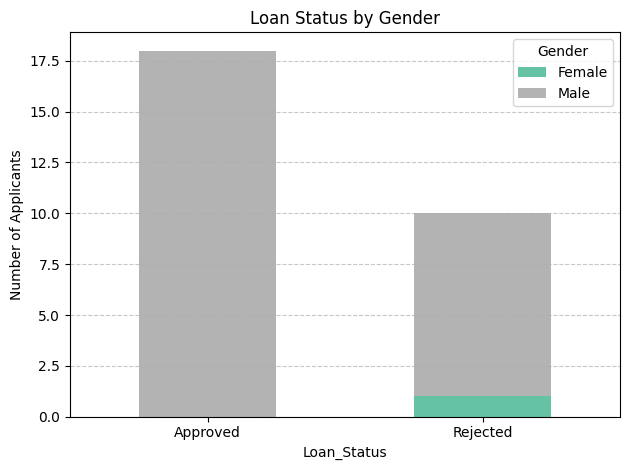

In [25]:
approval_counts = final_df.groupby(['Loan_Status', 'Gender']).size().unstack()
approval_counts.plot(kind='bar', stacked=True, colormap='Set2')
plt.title("Loan Status by Gender")
plt.ylabel("Number of Applicants")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

***Boxplot for Loan Amount***

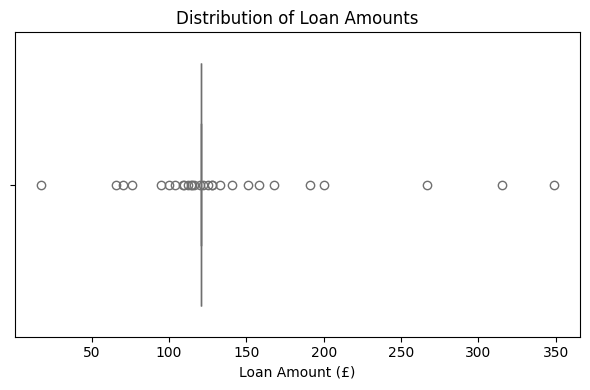

In [26]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=final_df['LoanAmount'], color='skyblue')
plt.title('Distribution of Loan Amounts')
plt.xlabel("Loan Amount (£)")
plt.tight_layout()
plt.show()

***Percentage of self-employed approvals***

In [27]:
approved = final_df[final_df['Loan_Status'] == 'Approved']
self_employed_approved_pct = (approved['Self_Employed'] == 'Yes').mean() * 100
print(f"Self-employed Approval Rate: {self_employed_approved_pct:.2f}%")

Self-employed Approval Rate: 16.67%


***Pie Chart for Self-employed Approvals***

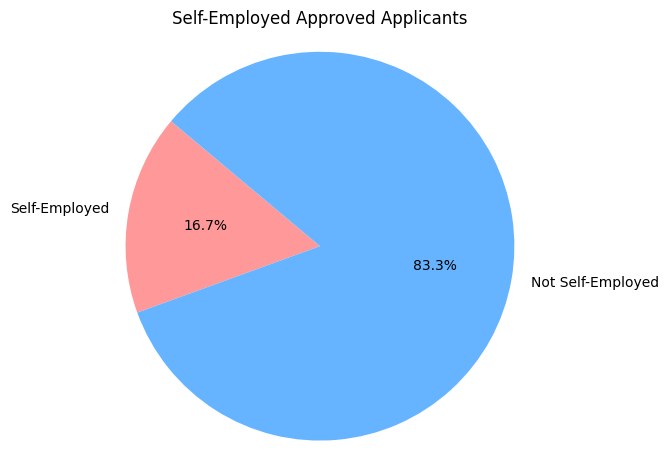

In [28]:
labels = ['Self-Employed', 'Not Self-Employed']
sizes = [
    (approved['Self_Employed'] == 'Yes').sum(),
    (approved['Self_Employed'] == 'No').sum()
]
colors = ['#ff9999','#66b3ff']
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Self-Employed Approved Applicants')
plt.axis('equal')
plt.tight_layout()
plt.show()

***Income Distribution***

In [31]:
print("Applicant Income Mean: ", final_df['ApplicantIncome'].mean())
print("Applicant Income Std: ", final_df['ApplicantIncome'].std())

Applicant Income Mean:  4321.357142857143
Applicant Income Std:  2461.024616703613


***Top 10 applicants by loan amount***

In [32]:
top_10 = final_df[['Loan_ID', 'LoanAmount', 'ApplicantIncome']].sort_values(by='LoanAmount', ascending=False).head(10)
print("Top 10 Applicants by Loan Amount:\n", top_10)

Top 10 Applicants by Loan Amount:
    Loan_ID  LoanAmount  ApplicantIncome
9   1020.0       349.0          12841.0
21  1046.0       315.0           5955.0
5   1011.0       267.0           5417.0
12  1028.0       200.0           3073.0
25  1066.0       191.0           9560.0
8   1018.0       168.0           4006.0
7   1014.0       158.0           3036.0
24  1052.0       151.0           3717.0
4   1008.0       141.0           6000.0
18  1038.0       133.0           4887.0


*** Property Distribution Chart***

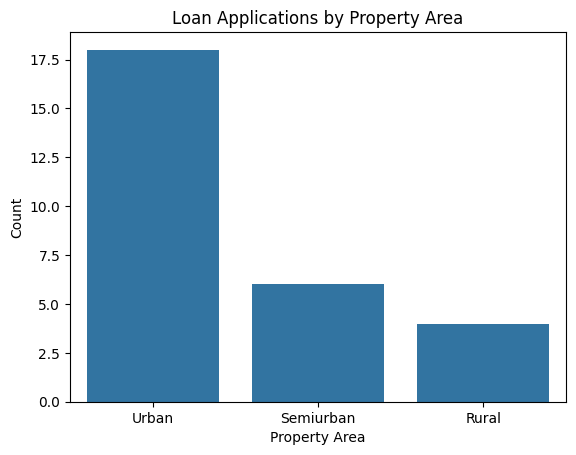

In [34]:
sns.countplot(data=final_df, x='Property_Area', order=['Urban', 'Semiurban', 'Rural'])
plt.title("Loan Applications by Property Area")
plt.ylabel("Count")
plt.xlabel("Property Area")
plt.show()